In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("traffic.csv")
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [7]:
df.columns


Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

In [ ]:
#data cleaning
df.drop_duplicates(inplace=True)
df.isnull().sum()
df['date'] = pd.to_datetime(df['date'])


In [13]:
total_clicks = len(df)
unique_users = df['linkid'].nunique()
avg_clicks = total_clicks / unique_users


In [15]:
#Rename Columns
df.rename(columns={
    'date': 'timestamp',
    'linkid': 'user_id'
}, inplace=True)
df

,event,timestamp,country,city,artist,album,track,isrc,user_id
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
5,click,2021-08-21,United States,Los Angeles,KenTheMan,I'm Perfect,I'm Perfect,US39N2102090,190c7170-4044-4c97-9709-926917155b02
...,...,...,...,...,...,...,...,...,...
226263,pageview,2021-08-24,Turks and Caicos Islands,Providenciales,"Kayla Nicole, Taylor Girlz, Flo Milli","Bundles 2 (feat. Flo Milli, Taylor Girlz)","Bundles 2 (feat. Flo Milli, Taylor Girlz)",QMCE32100359,fbf4b935-f961-4b13-b1d8-45ad47093559
226264,pageview,2021-08-24,Australia,Sydney,salem ilese,Mad at Disney,Mad at Disney,QMEZE2076989,61923241-cf99-4fe2-b9ec-6cf356565842
226269,pageview,2021-08-24,United Kingdom,London,Zeina,Talk Luv,Talk Luv,QZAKB2124527,4c402853-c65b-4ea5-ac65-04a9faf5c043
226272,pageview,2021-08-24,United States,Chicago,"Pop Smoke, 21 Savage, 42 Dugg",Faith,Bout A Million (feat. 42 Dugg & 21 Savage),USUM72112386,9ca8ca2d-3507-4287-8f66-a80314dc7169


In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
total_clicks = len(df)
unique_users = df['user_id'].nunique()
avg_clicks = total_clicks / unique_users

total_clicks, unique_users, avg_clicks


(122567, 3839, 31.92680385517062)

In [17]:
#KPI 1: Total Clicks
total_clicks = len(df)
total_clicks


122567

In [18]:
#KPI 2: Unique Users (Proxy)
unique_users = df['user_id'].nunique()
unique_users


3839

In [19]:
#KPI 3: Average Clicks per User (Engagement)
avg_clicks_per_user = total_clicks / unique_users
avg_clicks_per_user


31.92680385517062

In [ ]:
#Landing Interaction Analysis
df = df.sort_values(by='timestamp')

landing_interactions = df.groupby('user_id').first()
landing_interactions.head()


,event,timestamp,country,city,artist,album,track,isrc
user_id,,,,,,,,
00073307-ae96-5089-a117-4783afb42f8e,pageview,2021-08-19,United States,Wetumpka,Gunna,Drip Season 3 (Deluxe),Spending Addiction,None
00126b32-0c35-507b-981c-02c80d2aa8e7,pageview,2021-08-19,United States,Valrico,Jhené Aiko,Chilombo,P*$$Y Fairy (OTW),None
0018cfff-50a1-5984-9715-01ef2d11a49a,pageview,2021-08-19,United States,Orlando,K CAMP,RARE Sound,Can't Get Enough,None
0033934b-5d16-5a06-af58-d087bcdd3680,pageview,2021-08-19,Romania,Buzau,خالد إقبال,كملت نص دينى,كملت نص دينى,None
0034d6cf-3bd8-5ffe-aafc-b3959fc48608,pageview,2021-08-19,United States,Leonardtown,C1,Back in Blood (Remix),Back in Blood - Remix,None


In [21]:
#Top Landing Content
top_landing_tracks = landing_interactions['track'].value_counts().head(10)
top_landing_tracks


track
Baby Shark                                    5
Missing You                                   4
Freestyle                                     4
Happy Birthday                                4
Get Back                                      4
Heat Waves                                    4
Okay                                          4
Bout A Million (feat. 42 Dugg & 21 Savage)    3
ily (i love you baby) (feat. Emilee)          3
No Love                                       3
Name: count, dtype: int64

In [22]:
#Exit Interaction Analysis
exit_interactions = df.groupby('user_id').last()
exit_interactions.head()


,event,timestamp,country,city,artist,album,track,isrc
user_id,,,,,,,,
00073307-ae96-5089-a117-4783afb42f8e,pageview,2021-08-20,United States,Queens,Gunna,Drip Season 3 (Deluxe),Spending Addiction,None
00126b32-0c35-507b-981c-02c80d2aa8e7,click,2021-08-19,United States,Valrico,Jhené Aiko,Chilombo,P*$$Y Fairy (OTW),None
0018cfff-50a1-5984-9715-01ef2d11a49a,pageview,2021-08-19,United States,Orlando,K CAMP,RARE Sound,Can't Get Enough,None
0033934b-5d16-5a06-af58-d087bcdd3680,pageview,2021-08-19,Romania,Buzau,خالد إقبال,كملت نص دينى,كملت نص دينى,None
0034d6cf-3bd8-5ffe-aafc-b3959fc48608,pageview,2021-08-19,United States,Leonardtown,C1,Back in Blood (Remix),Back in Blood - Remix,None


In [23]:
#Top Exit Content
top_exit_tracks = exit_interactions['track'].value_counts().head(10)
top_exit_tracks


track
Baby Shark                                    5
Missing You                                   4
Freestyle                                     4
Happy Birthday                                4
Get Back                                      4
Heat Waves                                    4
Okay                                          4
Bout A Million (feat. 42 Dugg & 21 Savage)    3
ily (i love you baby) (feat. Emilee)          3
No Love                                       3
Name: count, dtype: int64

In [24]:
#Bounce Rate Calculation
clicks_per_user = df.groupby('user_id').size()

bounced_users = (clicks_per_user == 1).sum()
bounce_rate = (bounced_users / unique_users) * 100

bounce_rate


np.float64(35.556134410002606)

In [25]:
#Engagement Distribution
clicks_per_user.describe()



count    3839.000000
mean       31.926804
std       222.192710
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max      8288.000000
dtype: float64

In [26]:
#Country-Level Traffic Analysis
country_traffic = df['country'].value_counts().head(10)
country_traffic


country
United States     28664
India             18689
France            10565
Saudi Arabia       7682
United Kingdom     5095
Germany            4017
Canada             2784
Pakistan           2633
Iraq               2444
Turkey             2399
Name: count, dtype: int64

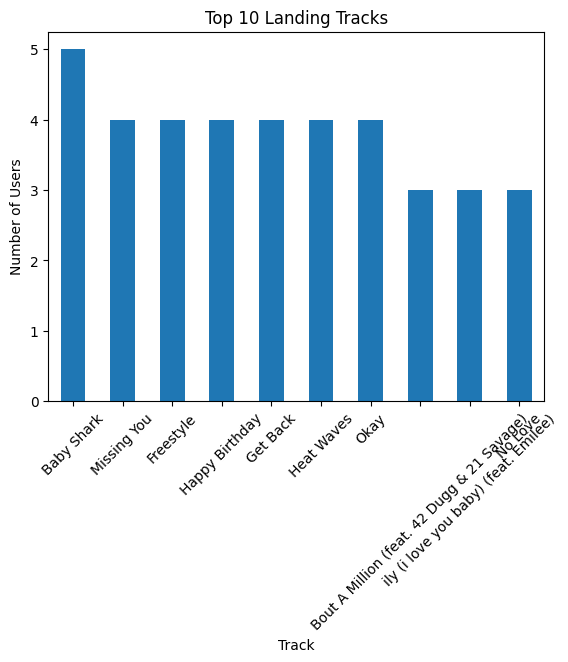

In [27]:
#Top Landing Tracks (Bar Chart)
plt.figure()
top_landing_tracks.plot(kind='bar')
plt.title("Top 10 Landing Tracks")
plt.xlabel("Track")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()



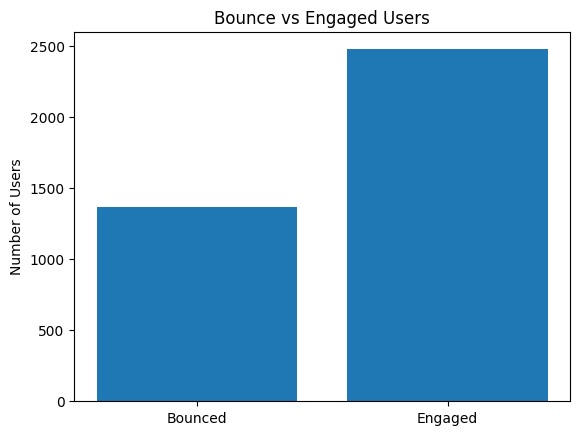

In [28]:
#Bounce vs Engaged Users
bounce_data = ['Bounced', 'Engaged']
values = [bounced_users, unique_users - bounced_users]

plt.figure()
plt.bar(bounce_data, values)
plt.title("Bounce vs Engaged Users")
plt.ylabel("Number of Users")
plt.show()


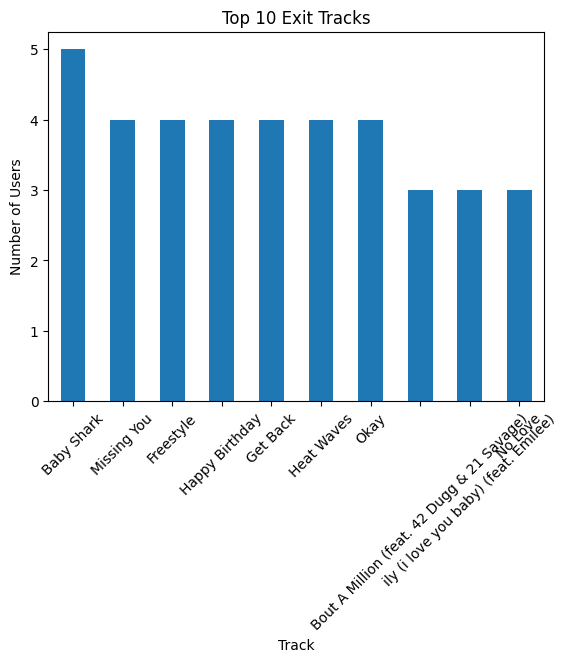

In [29]:
#Top Exit Tracks (Bar Chart)
# Exit interactions
exit_interactions = df.groupby('user_id').last()

top_exit_tracks = exit_interactions['track'].value_counts().head(10)

plt.figure()
top_exit_tracks.plot(kind='bar')
plt.title("Top 10 Exit Tracks")
plt.xlabel("Track")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()


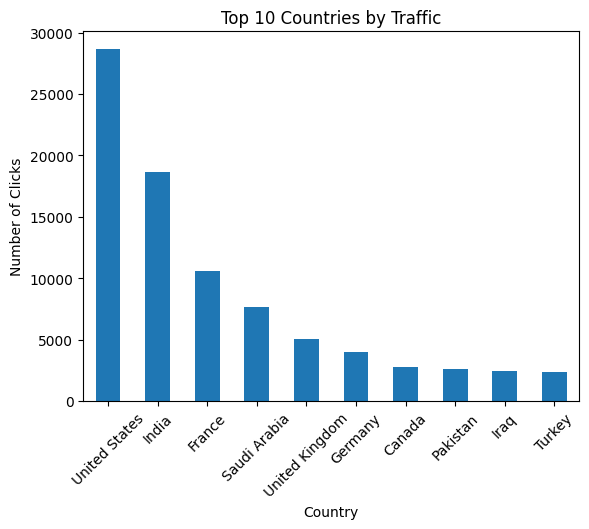

In [30]:
#Country-wise Traffic Distribution
country_traffic = df['country'].value_counts().head(10)

plt.figure()
country_traffic.plot(kind='bar')
plt.title("Top 10 Countries by Traffic")
plt.xlabel("Country")
plt.ylabel("Number of Clicks")
plt.xticks(rotation=45)
plt.show()
